In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linear(X,pars):
    out = X @ pars[:2].T + pars[2]
    grad_pars = np.column_stack([X,np.ones(len(X))])
    return out,grad_pars

def sigmoid(x):
    out = 1/(1+np.exp(-x))
    grad = out*(1-out)
    return out,grad.reshape(-1,1)

def theta_perceptron(X,pars):
    feature1,grad_linear1 = linear(X,pars[0:3])
    activation1,grad_sigmoid1 = sigmoid(feature1)
    return activation1, grad_sigmoid1*grad_linear1

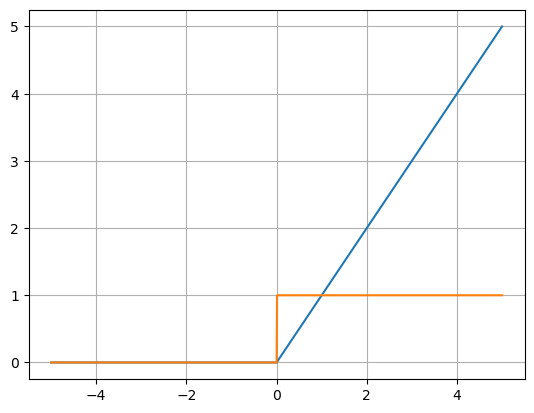

In [27]:
def relu(x):
    x_val = x.copy()
    x_val[x_val<0] = 0
    grad = np.where(x_val==0,np.zeros_like(x_val),np.ones_like(x_val))
    return x_val,grad.reshape(-1,1)

x = np.linspace(-5,5,1001)
y,grad = relu(x)

plt.figure()
plt.plot(x,y)
plt.plot(x,grad)
plt.grid()
plt.show()

In [28]:
def multilayer_perceptron(X,pars):
    f1,grad_f1 = linear(X,pars[0:3])
    f2,grad_f2 = linear(X,pars[3:6])
    f1_relu,grad_f1_relu = relu(f1)
    f2_relu,grad_f2_relu = relu(f2)
    xs = np.column_stack([f1_relu,f2_relu])
    out,grad3 = linear(xs,pars[6:9])
    theta,grad = sigmoid(out)
    return theta

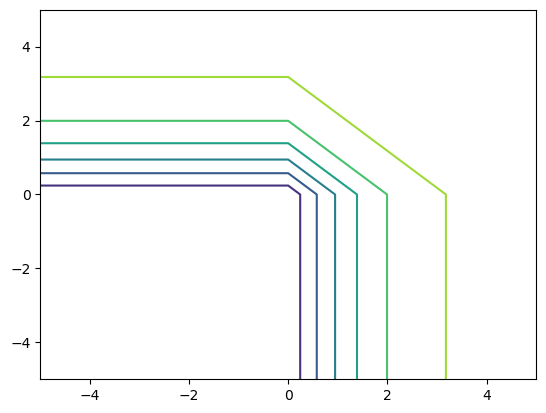

In [29]:
def plot_contour(func,pars):
    grid = np.mgrid[-5:5:101j,-5:5:101j]
    X = np.swapaxes(grid,0,-1).reshape(-1,2)
    out = func(X,pars)
    out = np.swapaxes(out.reshape(101,101),0,-1)
    plt.contour(grid[0],grid[1],out)
    
ex_arr = np.array([1,0,0,0,1,0,1,1,0])
plot_contour(multilayer_perceptron,ex_arr)

In [30]:
def linear2(X,pars):
    out = X @ pars[:2].T + pars[2]
    grad_pars = np.column_stack([X,np.ones(len(X))])
    grad_x = pars
    return out,grad_pars,grad_x.reshape(1,-1)

In [33]:
def multilayer_perceptron2(X,pars):
    f1,grad_f1,_ = linear2(X,pars[0:3])
    f2,grad_f2,_ = linear2(X,pars[3:6])
    f1_relu,grad_f1_relu = relu(f1)
    f2_relu,grad_f2_relu = relu(f2)
    xs = np.column_stack([f1_relu,f2_relu])
    out,grad3,grad_x = linear2(xs,pars[6:9])
    theta,grad_s = sigmoid(out)
    
    grad1 = grad_s*grad_x[:,0]*grad_f1_relu*grad_f1
    grad2 = grad_s*grad_x[:,1]*grad_f2_relu*grad_f2
    grad3 = grad_s*grad3
    grad = np.concatenate([grad1,grad2,grad3],axis=-1)
    return theta,grad

In [35]:
Xtest = np.array([[1.0,2.0]])
pars = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
out1,out2 = multilayer_perceptron2(Xtest,pars)
print(out1,out2)

[0.9552123] [[0.02994724 0.05989447 0.02994724 0.03422541 0.06845082 0.03422541
  0.03422541 0.08556353 0.04278176]]


In [37]:
def generate_data(N):
    import sklearn.datasets as skld
    X,z = skld.make_circles(N, noise = 0.1, factor=0.5)
    filt =  (X[:,1] > 0)
    return X[filt],z[filt]

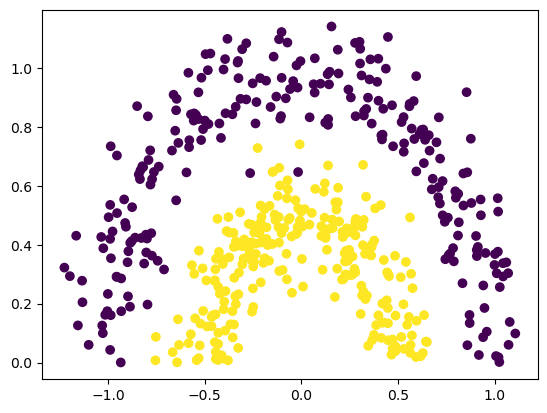

In [40]:
par = np.array([-.1,1,0,.1,1,0,-.1,-.1,0])
data,z = generate_data(1000)
plt.figure()
plt.scatter(data[:,0],data[:,1],c = z)
plt.show()

In [64]:
def loss(z,theta):
    out = np.where(z==1,-np.log(theta),-np.log(1-theta))
    grad = np.where(z==1,-1/theta,-1/(1-theta)*(-1))
    return out,grad.reshape(-1,1)

def empirical_risk(X,z,theta_func,pars):
    theta,grad_theta = theta_func(X,pars)
    loss_val,grad_loss = loss(z,theta)
    grad1 = grad_loss*grad_theta
    grad = np.concatenate([grad1], axis=-1)
    return loss_val.mean(axis=0),grad.mean(axis=0),theta

def plot(X,z,theta_func,pars):
    grid = np.mgrid[-5:5:101j,-5:5:101j]
    Xi = np.swapaxes(grid,0,-1).reshape(-1,2)   
    _,_,zi = empirical_risk(Xi,np.zeros(len(Xi)),theta_func,pars)
    zi = zi.reshape(101,101).T
    plt.contour(grid[0],grid[1],zi, levels = np.linspace(0,1,21))
    plt.scatter(X[:,0],X[:,1],c = z)
    plt.xlim(-2,2)
    plt.ylim(-2,2)

def learn(data,pars,theta_func, nsteps = 15000):
    X,z = data
    for i in range(nsteps):
        val,grad,_ = empirical_risk(X,z,theta_func,pars)
        pars = pars - 0.01*grad
        if i % (nsteps//4) == 0:
            print(val,pars)
            plot(X,z,theta_func,pars)
            plt.gcf().set_size_inches(5,5)
            plt.show()
    return pars

0.6785659280549973 [-1.00005066e-01  1.00006484e+00 -2.60007807e-05  9.99966550e-02
  1.00006502e+00 -1.68884506e-05 -1.00653462e-01 -1.00646882e-01
  2.50764611e-04]


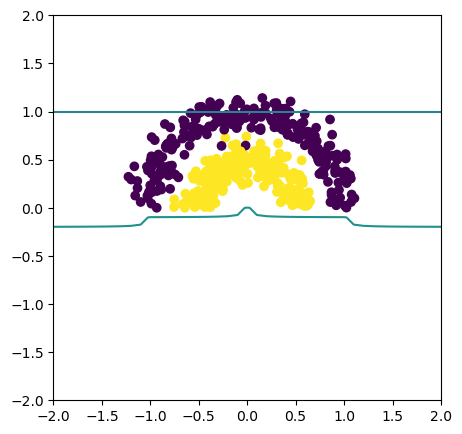

0.4077935278591218 [-0.90124861  1.62573604 -0.5958979   0.8488448   1.62104033 -0.54454697
 -1.67646196 -1.6263334   1.10989257]


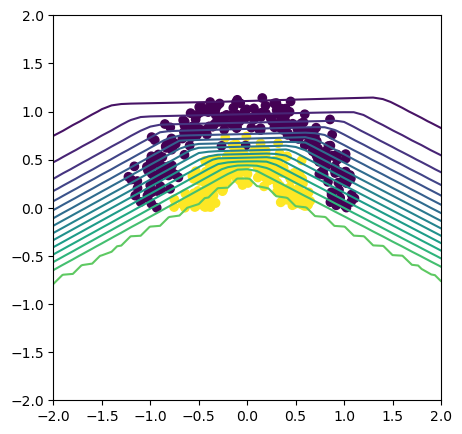

0.16756613637087064 [-2.00468912  2.10629562 -1.14603698  2.03661062  2.05721088 -1.1172901
 -2.96121054 -2.93739175  2.32052157]


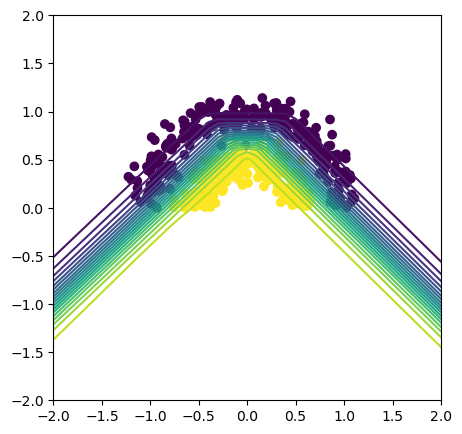

0.10657491242048293 [-2.42438278  2.46161886 -1.42619925  2.45778204  2.3857952  -1.38163751
 -3.60157728 -3.55551326  3.15490845]


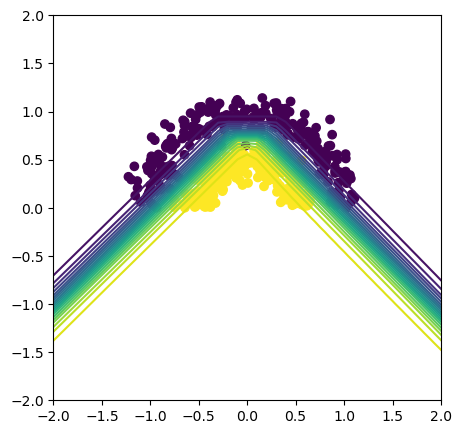

array([-2.64450244,  2.71861541, -1.58944024,  2.72182423,  2.56926515,
       -1.54840461, -3.98882199, -3.92518151,  3.70527174])

In [65]:
learn((data,z),par,multilayer_perceptron2)

1.1565461870818448 [ 0.69850496 -1.59384808 -1.36284611  1.23846604  0.52734619 -0.52859967
  0.37110378  0.95898687  0.42869799  0.81162145 -1.09174997  2.0294119
  0.38381118 -0.84750404 -0.54129902 -1.31808705 -0.58331902  0.22922654
  1.07876128  1.09630839  1.8413268  -0.94597365 -0.02751268 -0.18590166
 -2.12276614 -0.72798738 -1.35570073  0.71927756  0.03961467 -1.41238739
 -0.56861345  1.18392037 -0.25042127 -0.77135037  0.47173434 -1.12135143
  1.24911844 -0.59758958 -1.4806574  -0.04882421  1.26958752]


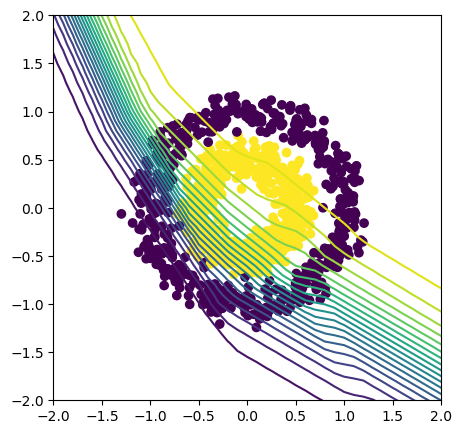

0.240800012783907 [ 1.51731705 -2.45505468 -0.42803404  0.80245204  0.3342627  -1.02530237
  1.00502654  2.25717814  0.15046736  1.37822969 -0.59961985  1.78373503
  0.27663027 -0.65272438 -0.76992549 -1.51630918 -0.23048906 -0.29232166
  0.42852382  0.57670725  2.17026846 -1.15255134  0.59278645 -0.26254986
 -2.73301484 -0.66125813 -0.880098    0.71927756  0.03961467 -1.41238739
 -1.9875577   1.05664507 -2.22484497 -0.25780359  0.39906952 -1.25089628
  1.01575131 -1.08423539 -1.9998564  -0.04882421  1.79027286]


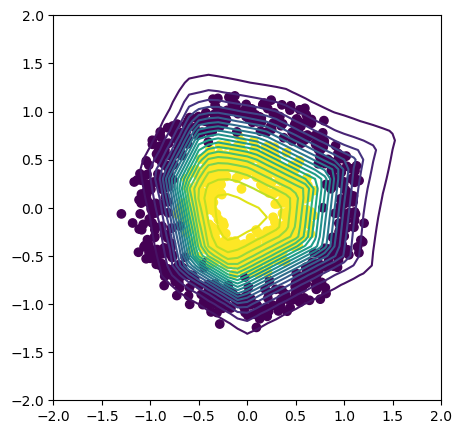

0.12226843901884796 [ 2.03341062 -2.89484932 -0.25038488  0.79891832  0.33289684 -1.02843572
  1.38759449  2.95949299 -0.00580532  1.39586193 -0.59156354  1.75608495
  0.27489339 -0.64801773 -0.77436102 -1.78075928 -0.12931104 -0.14840532
  0.20136847  0.48718686  2.58092359 -1.3209902   0.90387939 -0.29902527
 -3.10818429 -0.75017309 -0.66953595  0.71927756  0.03961467 -1.41238739
 -2.83112922  1.05658121 -3.08325064  0.08908193  0.39878081 -1.52866387
  1.65667668 -1.4416284  -2.44746186 -0.04882421  2.10211355]


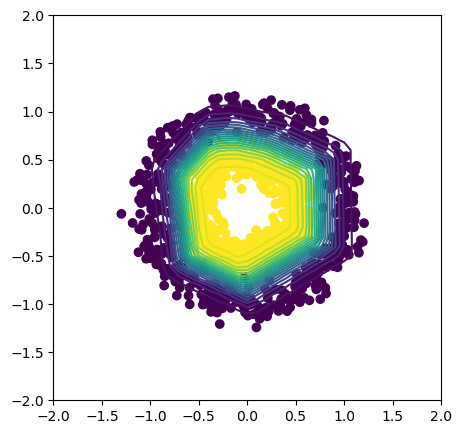

0.08068568179181594 [ 2.32255528 -3.14710079 -0.15633062  0.79832848  0.33266886 -1.02895873
  1.56612911  3.37693596 -0.04797586  1.38298385 -0.59531688  1.78759712
  0.27447751 -0.64671178 -0.77557041 -1.9569044  -0.05841049 -0.11569619
  0.07680057  0.44970556  2.88555653 -1.43442432  1.05995891 -0.36451139
 -3.35613875 -0.89206558 -0.48862249  0.71927756  0.03961467 -1.41238739
 -3.28034245  1.05657277 -3.5610599   0.29712754  0.39872457 -1.72430747
  2.08329073 -1.65554189 -2.75978574 -0.04882421  2.26548085]


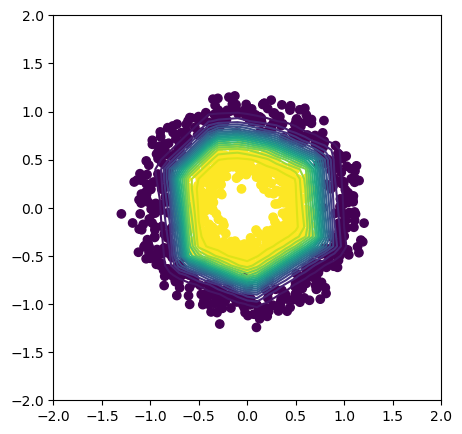

array([ 2.50438404, -3.33170904, -0.11698807,  0.79817414,  0.3326092 ,
       -1.02909558,  1.6687593 ,  3.66380341, -0.0773507 ,  1.36912447,
       -0.59770337,  1.82226296,  0.27430299, -0.64616235, -0.77608035,
       -2.09287881, -0.01057194, -0.12820761, -0.00909583,  0.4347895 ,
        3.10015511, -1.50273624,  1.17179088, -0.43303437, -3.55762175,
       -0.97139434, -0.39687055,  0.71927756,  0.03961467, -1.41238739,
       -3.5810079 ,  1.05657067, -3.87770382,  0.42205699,  0.39870591,
       -1.8771402 ,  2.36761992, -1.80158065, -3.01264086, -0.04882421,
        2.36200471])

In [71]:
N_NODES = 10
def linear_N(X,pars):
    out = X @ pars[:-1].T + pars[-1]
    grad_pars = np.column_stack([X,np.ones(len(X))])
    grad_x = pars[:-1]
    return out,grad_pars, grad_x.reshape(1,-1)

def many_nodes_mlp(X,pars):
    activations = []
    grads = []
    for i in range(N_NODES):
        feature, grad_f,_ = linear_N(X,pars[3*i:3*(i+1)])
        activation,grad_r = relu(feature)
        activations.append(activation)
        grads.append([grad_r,grad_f])
    
    hidden = np.column_stack(activations)
    output_feature,grad_f3,grad_x = linear_N(hidden,pars[-(N_NODES+1):])
    theta,grad_sig = sigmoid(output_feature)
    
    grad_components = []
    for i in range(N_NODES):
        grad = grad_sig*grad_x[:,i]*grads[i][0]*grads[i][1]
        grad_components.append(grad)
    grad3 = grad_sig*grad_f3
    grad = np.concatenate(grad_components+[grad3],axis=-1)
    return theta,grad

def generate_data_N(N):
    import sklearn.datasets as skld
    X,z = skld.make_circles(N, noise = 0.1, factor=0.5)
    return X,z

learn(generate_data_N(1000),np.random.normal(size = (3*N_NODES+N_NODES+1)) ,many_nodes_mlp)